<a href="https://colab.research.google.com/github/RioVossKernan/Learning-AI/blob/main/Dynamic_2D_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import math
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
points = pd.DataFrame()

def setPoints(clustNum, pointCount, variance):
  points = pd.DataFrame(columns = ['x','y','Cluster'])

  #set cluster centers
  clusterCenters = []
  for i in range(clustNum):
    clusterCenters.append({'x' : random.randint(0,99),
                           'y' : random.randint(0,99) })

  #get normal distribution values
  xvary = [int(i) for i in np.random.normal(0, variance, size = pointCount)]
  yvary = [int(i) for i in np.random.normal(0, variance, size = pointCount)]

  #Assign Points and add to dataframe
  for i in range(pointCount):
    clustLoc = random.randint(0,clustNum-1)                     #put the points on a random clusterCenter

    points.loc[i] = [clusterCenters[clustLoc]['x'] + xvary[i],  #location = clusterCenter + randomNumber
                     clusterCenters[clustLoc]['y'] + yvary[i],
                     0]                                         #assigned to cluster 0 by default

  return points

In [ ]:
#asssign each point to a random Cluster
def randAssignPoints():
  #if theres no clusters, cluster = 0. (just a bug fix)
  if len(clusters) == 0:
    for index, point in points.iterrows():
      point['Cluster'] = 0

  #for each point, cluster = random cluster
  else:
    for index, point in points.iterrows():
      point['Cluster'] = random.randint(0,len(clusters)-1)

In [ ]:
clusters = []

def buildClusters(size):
  clusters.clear()

  #put them in random positions
  for i in range(size):
    clusters.append({'x' : random.randint(0,99),
                     'y' : random.randint(0,99),
                     'ID' : i}) #this is the number of the cluster. clusters are associated with points that have the same ID.

  return clusters

In [ ]:
def centerClusters():
  for c in clusters:

    # get points in this cluster
    members = []
    for index, point in points.iterrows():
      if point['Cluster'] == c['ID']:
        members.append(point)

    if members:
      #get sum of pos
      aveX = 0
      aveY = 0
      for point in members:
        aveX += point['x']
        aveY += point['y']

      #get average pos (midpoint)
      if not len(members) ==0 :
        aveX /= len(members)
        aveY /= len(members)

      #cluster pos = midpoint of member points
      c['x'] , c['y'] = aveX , aveY

    else: #move to closest point if members = 0
      dists = []
      for index, point in points.iterrows():
        xdist = point['x'] - c['x']
        ydist = point['y'] - c['y']
        dists.append(math.sqrt(xdist*xdist + ydist*ydist))
      closestPoint = dists.index(min(dists))
      #cluster x,y = closest point x,y
      c['x'] , c['y'] = points.loc[closestPoint]['x'] , points.loc[closestPoint]['y']

In [ ]:
def assignPointsToClusters():
  for index, point in points.iterrows():
    #best cluster by default is starting cluster
    xdist = point['x'] - clusters[point['Cluster']]['x']
    ydist = point['y'] - clusters[point['Cluster']]['y']
    bestDist = math.sqrt(xdist*xdist + ydist*ydist)

    for c in clusters:
      #if new cluster is better than the best, new becomes best cluster
      xdist = point['x'] - c['x']
      ydist = point['y'] - c['y']
      dist = math.sqrt(xdist*xdist + ydist*ydist)

      if dist < bestDist:
        bestDist = dist
        point['Cluster'] = c['ID']

In [ ]:
def placeClusters(isDraw):
    #as long as things are changing, keep going
    #center clusters then reassign, rinse repeat until cluster centers move to perfect position
    while True:
      prev = points.Cluster.values.tolist()
      if isDraw:
        graph()
      assignPointsToClusters()
      centerClusters()

      if prev == points.Cluster.values.tolist():
        break

In [ ]:
def graph():
  plt.figure(figsize = (11,11))

  sns.scatterplot(data = points,
                  x = 'x',
                  y = 'y',
                  hue = 'Cluster',
                  style = 'Cluster',
                  s = 150,
                  palette = 'rainbow'
                  )

  clustX = []
  clustY = []
  clustHue = []
  for i in clusters:
    clustX.append(i['x'])
    clustY.append(i['y'])
    clustHue.append(i['ID'])


  sns.scatterplot(x = clustX,
                  y = clustY,
                  s = 500,
                  color = 'k',
                  style = clustHue
                  )

  plt.ylim(-vary*2, 100+vary*2)
  plt.xlim(-vary*2, 100+vary*2)
  plt.show()

In [ ]:
def scoreBoard():
  score = 0
  for index, point in points.iterrows():
    xdist = point['x'] - clusters[point['Cluster']]['x']
    ydist = point['y'] - clusters[point['Cluster']]['y']
    score += math.sqrt(xdist*xdist + ydist*ydist)
  return score

In [ ]:
#STANDARD CLUSTERING
vary = 10
points = setPoints(3, 300, vary)

clusters = buildClusters(5)
randAssignPoints()
placeClusters(True)
graph()

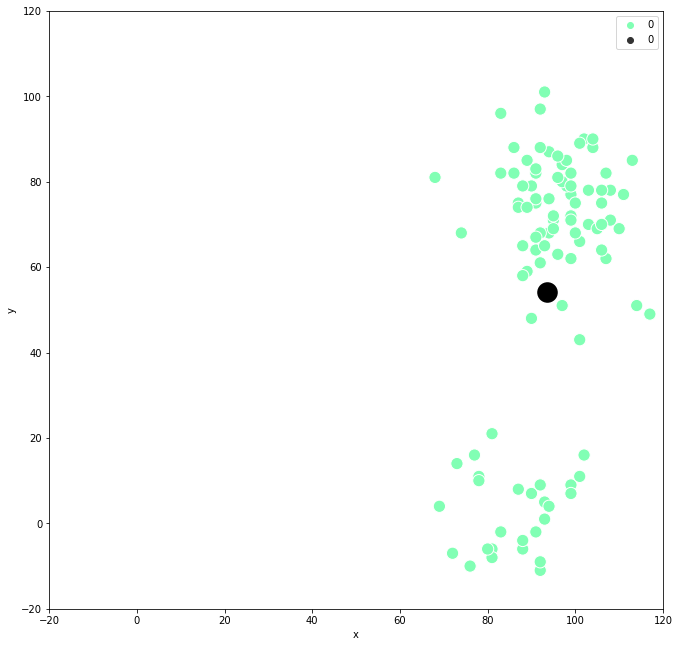

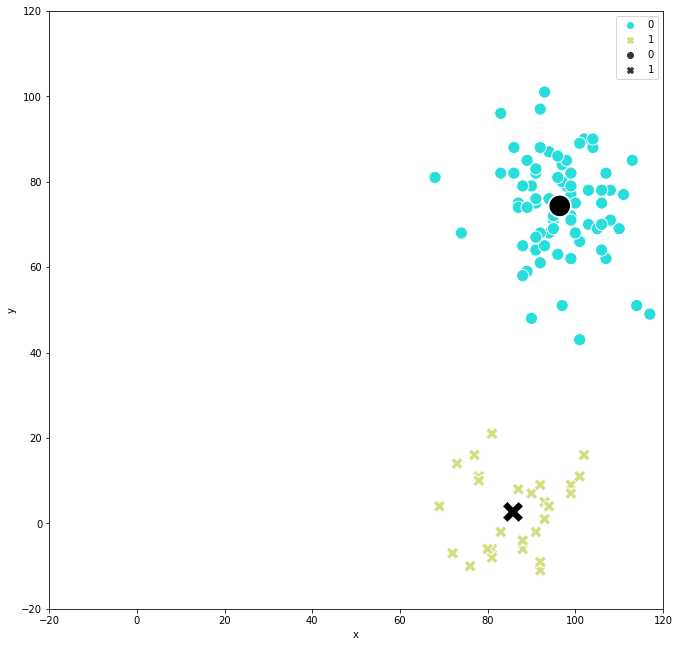

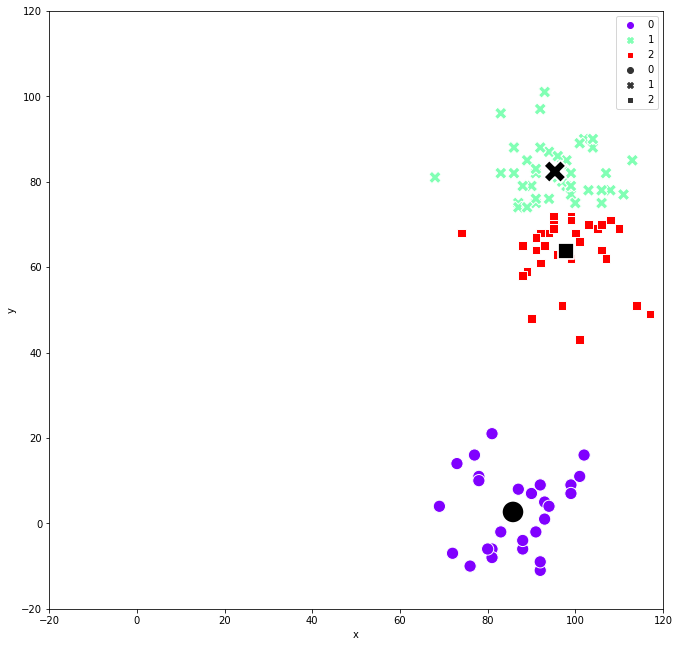

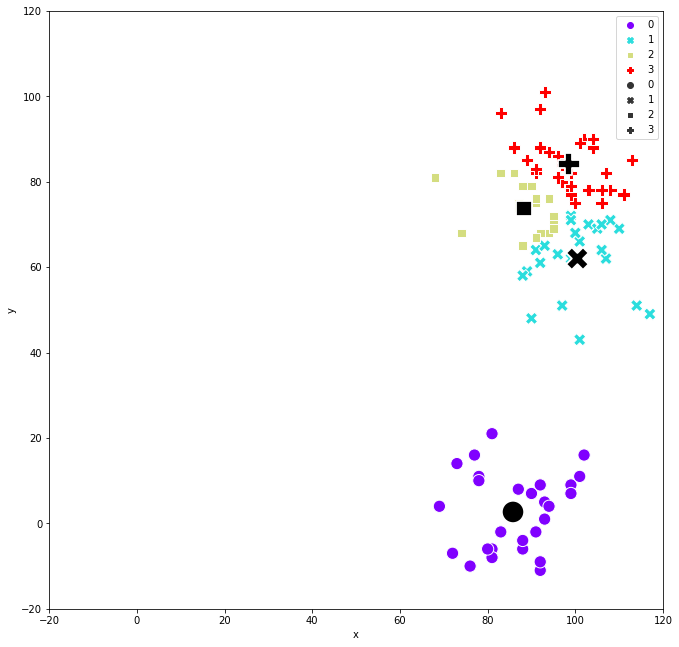

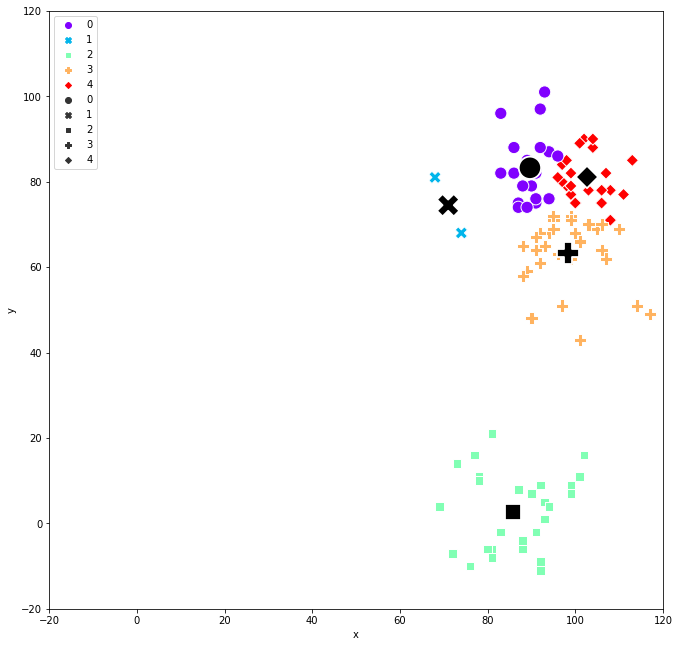

[3146.949968510757, 1250.5762903839552, 1037.7984668121835, 962.0247880428691, 919.3922370527721]


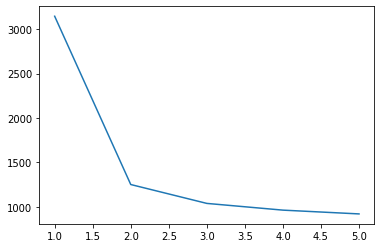

In [ ]:
#DYNAMIC CLUSTERING
vary = 10
points = setPoints(3, 100, vary)

scores = []
for i in range(1,6):
  clusters = buildClusters(i)
  randAssignPoints()
  placeClusters(False)
  scores.append(scoreBoard())
  graph()

print(scores)
sns.lineplot(y = scores,
             x = range(1,len(scores)+1))